# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
import warnings; warnings.simplefilter('ignore')

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))

Loaded feature names:  126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [5]:
def P1():
### STUDENT START ###
    pca = PCA(n_components = 50)
    pca.fit(train_data)
    for i, n in zip(pca.explained_variance_ratio_, range(1,51)):
        print("K = ", n, "% of Total Variance: ", round(i * 100, 2), "%")
P1()

K =  1 % of Total Variance:  16.4 %
K =  2 % of Total Variance:  13.32 %
K =  3 % of Total Variance:  10.17 %
K =  4 % of Total Variance:  7.06 %
K =  5 % of Total Variance:  3.87 %
K =  6 % of Total Variance:  3.68 %
K =  7 % of Total Variance:  3.13 %
K =  8 % of Total Variance:  2.73 %
K =  9 % of Total Variance:  2.62 %
K =  10 % of Total Variance:  2.23 %
K =  11 % of Total Variance:  2.05 %
K =  12 % of Total Variance:  1.87 %
K =  13 % of Total Variance:  1.73 %
K =  14 % of Total Variance:  1.68 %
K =  15 % of Total Variance:  1.52 %
K =  16 % of Total Variance:  1.51 %
K =  17 % of Total Variance:  1.43 %
K =  18 % of Total Variance:  1.41 %
K =  19 % of Total Variance:  1.33 %
K =  20 % of Total Variance:  1.15 %
K =  21 % of Total Variance:  1.07 %
K =  22 % of Total Variance:  1.07 %
K =  23 % of Total Variance:  1.04 %
K =  24 % of Total Variance:  0.99 %
K =  25 % of Total Variance:  0.91 %
K =  26 % of Total Variance:  0.87 %
K =  27 % of Total Variance:  0.8 %
K =  28 %

According to the output, the fraction of the total variance explained in the training data starts to decline exponentially once we go beyond 4 principal components. Curse of dimensionality case in point. 

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

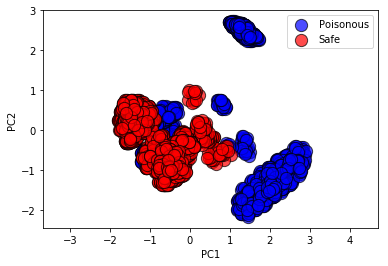

In [6]:
# check inverse values
def P2():
### STUDENT START ###
    pca_2 = PCA(n_components = 2)
    pca_2.fit(train_data)
    pca_2_train_data = pca_2.transform(train_data)
    scatter1 = plt.scatter(pca_2_train_data[train_labels == 1, 0], pca_2_train_data[train_labels == 1, 1], c = "blue", edgecolors = "black", s = 150, alpha = 0.7)
    scatter2 = plt.scatter(pca_2_train_data[train_labels == 0, 0], pca_2_train_data[train_labels == 0, 1], c = "red", edgecolors = "black", s = 150, alpha = 0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend((scatter1, scatter2), ("Poisonous", "Safe"))
    plt.axis('equal');
### STUDENT END ###

P2()

### Part 3:

Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

Number of Clusters:  1


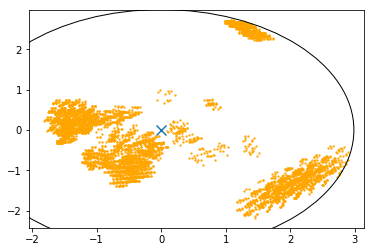

Number of Clusters:  2


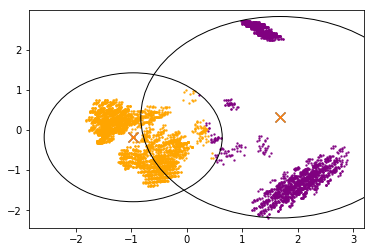

Number of Clusters:  3


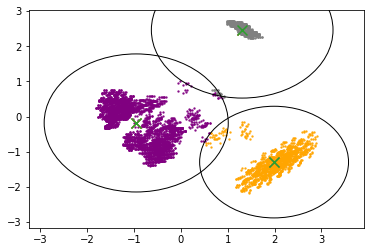

Number of Clusters:  4


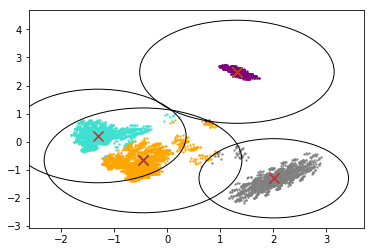

Number of Clusters:  5


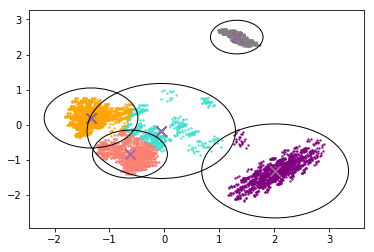

Number of Clusters:  6


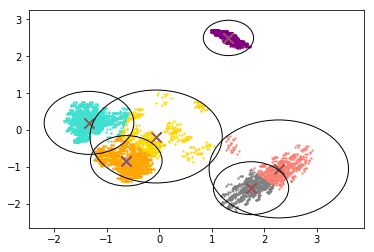

Number of Clusters:  7


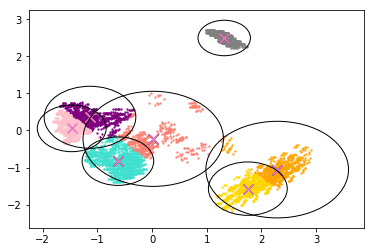

Number of Clusters:  8


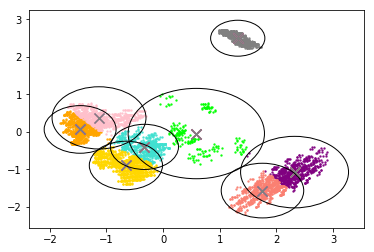

Number of Clusters:  9


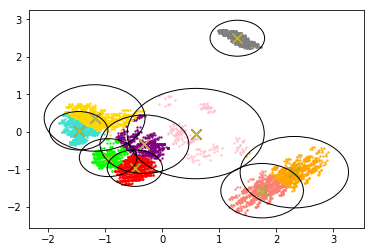

Number of Clusters:  10


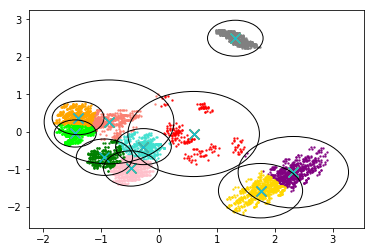

Number of Clusters:  11


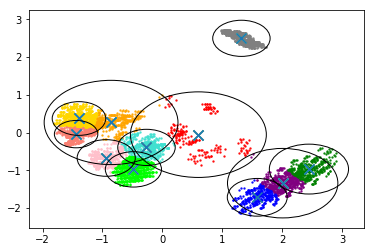

Number of Clusters:  12


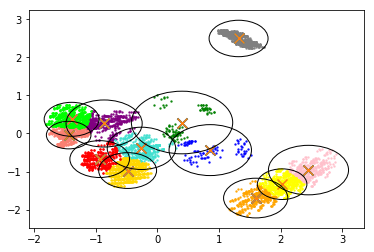

Number of Clusters:  13


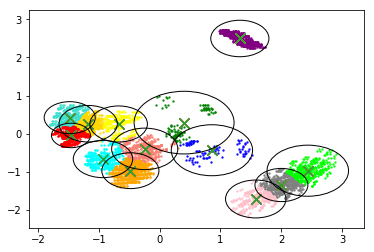

Number of Clusters:  14


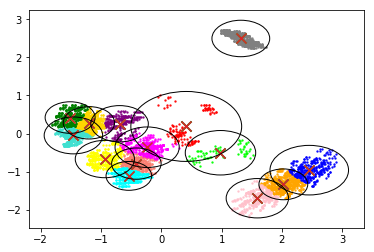

Number of Clusters:  15


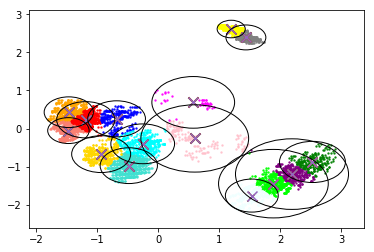

Number of Clusters:  16


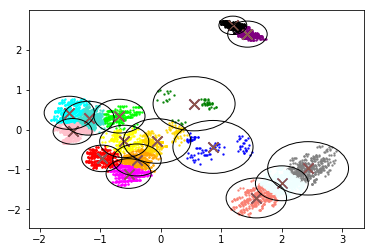

In [7]:
def P3():
### STUDENT START ###
# Creating 2d projected train data
    pca_3 = PCA(n_components = 2)
    pca_3.fit(train_data)
    pca_3_train_data = pca_3.transform(train_data)

    # yay custom colors
    colors = ['orange','purple','gray','turquoise', 
                    'salmon', 'gold', 'pink', 'lime',
                    'red','green','blue','yellow', 
                    'cyan', 'magenta', 'azure', 'black']

    # Running Kmeans for 1 ~16 clusters
    for k in range(1,17):
        km = KMeans(n_clusters = k, init = 'k-means++')
        clstrs = km.fit(pca_3_train_data)
        dist = km.transform(pca_3_train_data)
        fig, ax = plt.subplots(1,1)
        print("Number of Clusters: ", k)
        for i in range(k):
            # plotting scatter plots for each centroid and assigning different colors for PCA points in different clusters
            plt.scatter(pca_3_train_data[np.where(km.labels_ == i)][:, 0], 
                        pca_3_train_data[np.where(km.labels_ == i)][:, 1], c = colors[i], s = 2, alpha = 0.8)
            # marking the center of each cluster with "x"
            plt.scatter(clstrs.cluster_centers_[:, 0], clstrs.cluster_centers_[:, 1], marker = 'x', s = 100)
            # drawing/adding circles, where radius is the max distance among available PCA points from the centroid
            ax.add_patch(plt.Circle((clstrs.cluster_centers_[i]), np.where(km.labels_ == i, dist[:, i],0).max(), fill = False))
        plt.show()


### STUDENT END ###

P3()

### Part 4:

Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

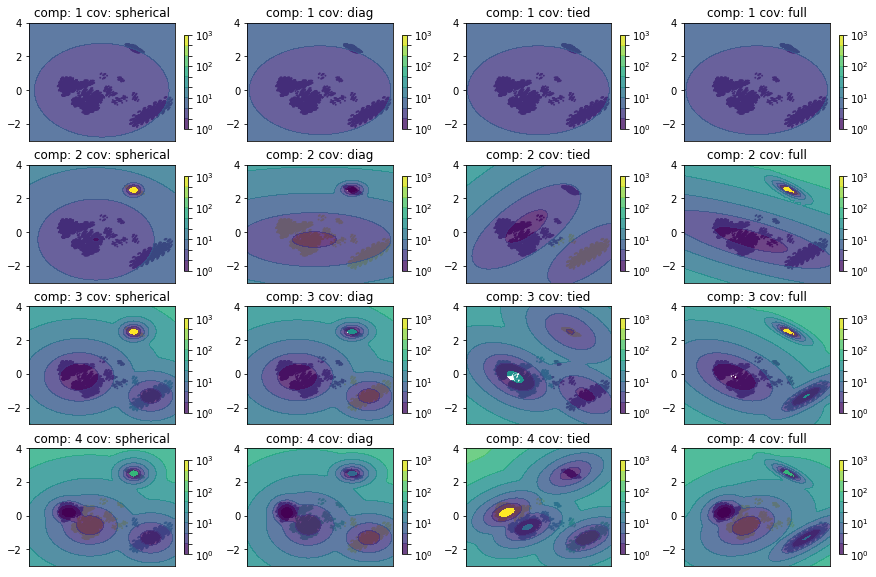

In [8]:
def P4():
### STUDENT START ###
    pca_4 = PCA(n_components = 2)
    pca_4.fit(train_data)
    pca_4_train_data = pca_4.transform(train_data)
    # setting 4x4 subplot for the GMM
    fig, axs = plt.subplots(4, 4, figsize = (15,10))
    # looping for 4 n_components in GMM
    for i in range(1,5):
        # within each n_component, loop on 4 different covariance matrix type
        for j, n in zip(['spherical', 'diag', 'tied', 'full'], range(1,5)):
            gm_mod = GaussianMixture(n_components = i, covariance_type = j)
            gm_mod.fit(pca_4_train_data)
            x = np.linspace(-3., 3.)
            y = np.linspace(-3., 4.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gm_mod.score_samples(XX)
            Z = Z.reshape(X.shape)
            # setting each axs in the subplot
            ax = axs[i-1, n-1]
            ax.scatter(pca_4_train_data[:, 0], pca_4_train_data[:, 1], 0.8, c=gm_mod.predict(pca_4_train_data))
            SM = ax.contourf(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10), alpha = 0.8)
            #CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             #levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(SM, ax = axs[i-1, n-1], shrink=0.8, extend='both')
            ax.title.set_text("comp: "+ str(i) + " cov: " + j)
            ax.get_xaxis().set_visible(False)
    plt.show()
### STUDENT END ###

P4()

Density contour plots generated for n_component = 1 did not have any noticeable difference, despite the fact that different covariance matrix have been applied. 

As the component size increases, you can observe how each covariance matrix starts "grouping" our data points differently.

To be more specific, a single data point on (n_component = 4) can be grouped into different clusters depending on the cov matrix configuration.

GMMs have to be examined in many different ways before we feel confident about which parameters to implement.

### Part 5:

Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [9]:
def P5():
### STUDENT START ###
    # creating 2d projected data
    pca_5b = PCA(n_components = 2)
    pca_5b.fit(train_data)
    pca_5b_train_data = pca_5b.transform(train_data)
    pca_5b_test_data = pca_5b.transform(test_data)
    # splitting the pos/neg by train_labels
    pca_5b_train_data_pos = pca_5b_train_data[train_labels == 1]
    pca_5b_train_data_neg = pca_5b_train_data[train_labels == 0]

    # fitting 4 component, full covariance GMM for positive examples
    test_gmm_pos = GaussianMixture(n_components = 4, covariance_type = "full")
    pos_fit = test_gmm_pos.fit(pca_5b_train_data_pos)

    # fitting 4 component, full covariance GMM for negative examples
    test_gmm_neg = GaussianMixture(n_components = 4, covariance_type = "full")
    neg_fit = test_gmm_neg.fit(pca_5b_train_data_neg)

    # computing the weighted log probability for each test data
    pos_score_arr = pos_fit.score_samples(pca_5b_test_data)
    neg_score_arr = neg_fit.score_samples(pca_5b_test_data)

    # choosing the label with higher log probability
    pred_arr = np.where(pos_score_arr > neg_score_arr, 1, 0)

    # evaluating accuracy vs test_labels
    ## looping through each sample and if they match with test label, they will be marked as 1. Else, 0.
    print("Accuracy of custom prediction: ", np.mean(np.where(pred_arr == test_labels, 1, 0)))


### STUDENT END ###

P5()

Accuracy of custom prediction:  0.943950177935943


### Part 6:

Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [10]:
def P6():
### STUDENT START ###
# brute forcing my way to come up with a list of configurations that have less than 50 free parameters 
    n_pca = 1
    results = []
    for i in ['spherical', 'diag', 'tied', 'full']:
    # for i in ['full']:
        if i == "full":
            for g in list(range(1,16)):
                for k in list(range(1,16)):
                    param_no = ((k + (k * k)) * g) * 2
                    if param_no <= 50:
                        temp_config = np.array([i, k, g, param_no])
                        results.append(temp_config)
        if i == "diag":
            for g in list(range(1,16)):
                for k in list(range(1,16)):
                    param_no = (2 * k) * g * 2
                    if param_no <= 50:
                        temp_config = np.array([i, k, g, param_no])
                        results.append(temp_config)
        if i == "spherical":
            for g in list(range(1,16)):
                for k in list(range(1,16)):
                    param_no = (k + 1) * g * 2
                    if param_no <= 50:
                        temp_config = np.array([i, k, g, param_no])
                        results.append(temp_config)

        else:
            for g in list(range(1,16)):
                for k in list(range(1,16)):
                    param_no = (k * g + (0.5 * k * (k + 1))) * 2
                    if param_no <= 50:
                        temp_config = np.array([i, k, g, param_no])
                        results.append(temp_config)

# fitting each configuration and calculating the accuracy
    final_results = []
    for config in results:
        # applying PCA for both postiive and negative
        pca_6 = PCA(n_components = int(config[1]))
        pca_6.fit(train_data)
        pca_6_train_data = pca_6.transform(train_data)
        pca_6_test_data = pca_6.transform(test_data)
        
        pca_6_train_data_pos = pca_6_train_data[train_labels == 1]
        pca_6_train_data_neg = pca_6_train_data[train_labels == 0]

        # fitting GMM for positives
        gmm_6_pos = GaussianMixture(n_components = int(config[2]), covariance_type = config[0])
        gmm_6_pos.fit(pca_6_train_data_pos)

        # fitting GMM for negatives
        gmm_6_neg = GaussianMixture(n_components = int(config[2]), covariance_type = config[0])
        gmm_6_neg.fit(pca_6_train_data_neg)

        pos_score_arr = gmm_6_pos.score_samples(pca_6_test_data)
        neg_score_arr = gmm_6_neg.score_samples(pca_6_test_data)

        # choosing the label with higher log probability 
        pred_arr = np.where(pos_score_arr > neg_score_arr, 1, 0)

        # accuracy = np.mean(np.where(pred_arr == test_labels, 1, 0))  same as accuracy_score
        accuracy_2 = metrics.accuracy_score(test_labels, pred_arr)

        temp_final = np.array([config[0], config[1], config[2], config[3], accuracy_2])
        final_results.append(temp_final)

    # sorting our final results by accuracy
    final_results.sort(key=lambda x: x[-1], reverse = True)

    for item in final_results:
        print("covariance matrix: ", item[0], "\nPCA #: ", item[1], " GMM #: ", item[2], " # of Param: ",
               int(float(item[3])), " Accuracy: ", round(float(item[4])*100,2),"%")
### STUDENT END ###

P6()

covariance matrix:  spherical 
PCA #:  6  GMM #:  3  # of Param:  42  Accuracy:  97.42 %
covariance matrix:  spherical 
PCA #:  7  GMM #:  3  # of Param:  48  Accuracy:  97.33 %
covariance matrix:  tied 
PCA #:  4  GMM #:  3  # of Param:  44  Accuracy:  96.98 %
covariance matrix:  spherical 
PCA #:  5  GMM #:  4  # of Param:  48  Accuracy:  96.8 %
covariance matrix:  spherical 
PCA #:  5  GMM #:  3  # of Param:  36  Accuracy:  96.62 %
covariance matrix:  full 
PCA #:  5  GMM #:  2  # of Param:  50  Accuracy:  96.44 %
covariance matrix:  diag 
PCA #:  3  GMM #:  5  # of Param:  42  Accuracy:  96.26 %
covariance matrix:  diag 
PCA #:  3  GMM #:  6  # of Param:  48  Accuracy:  96.0 %
covariance matrix:  spherical 
PCA #:  3  GMM #:  4  # of Param:  32  Accuracy:  95.91 %
covariance matrix:  spherical 
PCA #:  3  GMM #:  5  # of Param:  40  Accuracy:  95.91 %
covariance matrix:  spherical 
PCA #:  3  GMM #:  6  # of Param:  48  Accuracy:  95.91 %
covariance matrix:  tied 
PCA #:  5  GMM #:

PCA #:  1  GMM #:  3  # of Param:  8  Accuracy:  90.84 %
covariance matrix:  diag 
PCA #:  1  GMM #:  7  # of Param:  16  Accuracy:  90.84 %
covariance matrix:  tied 
PCA #:  1  GMM #:  13  # of Param:  28  Accuracy:  90.84 %
covariance matrix:  full 
PCA #:  1  GMM #:  3  # of Param:  12  Accuracy:  90.84 %
covariance matrix:  tied 
PCA #:  1  GMM #:  6  # of Param:  14  Accuracy:  90.75 %
covariance matrix:  spherical 
PCA #:  3  GMM #:  3  # of Param:  24  Accuracy:  90.66 %
covariance matrix:  diag 
PCA #:  1  GMM #:  4  # of Param:  10  Accuracy:  90.66 %
covariance matrix:  diag 
PCA #:  9  GMM #:  1  # of Param:  36  Accuracy:  90.3 %
covariance matrix:  diag 
PCA #:  5  GMM #:  2  # of Param:  40  Accuracy:  90.21 %
covariance matrix:  spherical 
PCA #:  1  GMM #:  2  # of Param:  8  Accuracy:  89.86 %
covariance matrix:  diag 
PCA #:  1  GMM #:  2  # of Param:  8  Accuracy:  89.86 %
covariance matrix:  diag 
PCA #:  1  GMM #:  2  # of Param:  6  Accuracy:  89.86 %
covariance m

The accuracy will change for each model per every execution of this codeblock. However, it's important to note that high accuracy can be achieved from many different configurations. 

Lesson learned: Don't get locked in to a single configuration and don't be afraid to experiment with different configurations. Just be careful not to overtune your hyperparameters. 